# Predicting IMDB Rating for Movies
The goal of this project is to build a model that predicts the IMDB rating score based on attributes as duration, actors or even titles. Take some time to understand the data, which movies have the highest score? Is there any relationship between the score and the cast? What about the movie director? More info about this data [here](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset).

In [1]:
## Davin Barthold
# import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# read csv to pandas dataframe
imdb_data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv")
#print(imdb_data.head())

In [3]:
# sample 1500 rows of the dataset for project
df = imdb_data.sample(n=1500, random_state=99)

In [4]:
# columns to be scaled
columns_to_scale = ['duration', 'num_critic_for_reviews', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users',
                    'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year',
                    'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

# selected columns
numeric_df = df[columns_to_scale]

# standard scaler on the dataframe
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
df[columns_to_scale] = scaled_df

# verify the changes
print(df.head())

                 color    director_name  num_critic_for_reviews  duration  \
3801             Color        Oren Peli                     NaN       NaN   
104              Color   Jon Turteltaub                0.177934 -0.644345   
4367   Black and White   Jonathan Wacks                     NaN       NaN   
3607             Color  Kevin Macdonald                     NaN       NaN   
2246             Color       Steve Rash                     NaN       NaN   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
3801                      NaN                    14.0       Sandra Staggs   
104                 -0.255242                   370.0  Omar Benson Miller   
4367                      NaN                   482.0         Gary Farmer   
3607                      NaN                    25.0      Simon McBurney   
2246                      NaN                   281.0          Adam Arkin   

      actor_1_facebook_likes     gross                            genres  

In [5]:
# check for missing values
print(df.isna().sum())  

color                           3
director_name                  28
num_critic_for_reviews       1041
duration                     1034
director_facebook_likes      1041
actor_3_facebook_likes          8
actor_2_name                    5
actor_1_facebook_likes       1033
gross                        1118
genres                          0
actor_1_name                    3
movie_title                     0
num_voted_users              1032
cast_total_facebook_likes    1032
actor_3_name                    8
facenumber_in_poster         1032
plot_keywords                  49
movie_imdb_link                 0
num_user_for_reviews         1037
language                        4
country                         1
content_rating                 94
budget                       1076
title_year                   1042
actor_2_facebook_likes       1034
imdb_score                   1032
aspect_ratio                 1078
movie_facebook_likes         1032
dtype: int64


In [6]:
# drop na values
df.dropna(inplace=True)
df.drop('color', axis=1, inplace=True)
#print(df.head())

In [7]:
# descriptive statistics on scaled dataframe
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.222927,0.106736,0.015648,1072.256637,0.063847,0.064632,0.126857,0.103323,-0.031005,0.177984,-0.005552,0.051669,0.132134,-0.035901,-0.059983,0.143577
std,1.033351,0.804380,1.027479,2245.545467,0.548100,0.992771,0.950277,0.650519,0.846752,1.137523,0.137438,0.712676,0.903441,0.934018,0.191503,1.367249
min,-1.117231,-2.021455,-0.257262,0.000000,-0.332387,-0.723277,-0.661395,-0.420786,-0.597930,-0.725780,-0.137604,-4.545776,-0.353449,-3.709612,-0.617173,-0.376808
25%,-0.525960,-0.421030,-0.254400,303.000000,-0.295986,-0.546479,-0.512462,-0.331949,-0.597930,-0.453915,-0.102086,-0.285290,-0.269228,-0.698563,-0.267017,-0.376808
50%,-0.071445,-0.048838,-0.235714,539.000000,-0.244859,-0.257638,-0.204124,-0.227091,-0.157133,-0.168591,-0.051515,0.116642,-0.207559,0.031388,0.097729,-0.361631
75%,0.704849,0.453621,-0.171409,848.000000,0.237268,0.313521,0.456154,0.349173,0.283664,0.371102,0.040702,0.598962,-0.154272,0.670095,0.097729,0.163490
max,4.570233,3.673081,7.149627,19000.000000,3.480669,8.464213,6.716752,3.521442,6.014027,7.370960,0.605902,1.081281,4.236403,1.947510,0.396820,16.765381


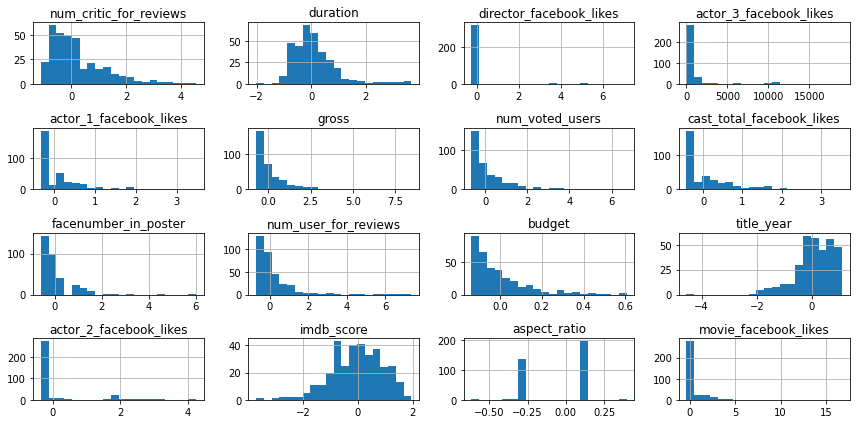

In [8]:
# histogram of column distributions
numeric_df = df.select_dtypes(include='number')
numeric_df.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

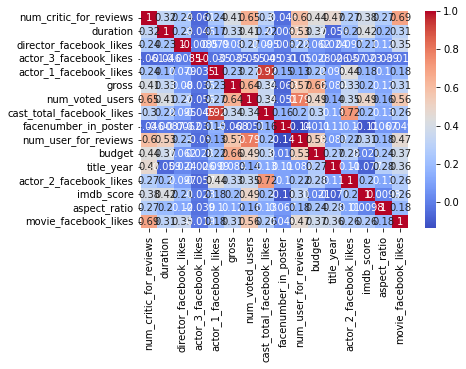

In [9]:
# correlation matrix of columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['imdb_score'], axis=1)  # Features
y = df['imdb_score']  # Target variable

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

# evlaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Training:")
print("MSE:", mse_train)
print("R-squared Score:", r2_train)
print("\nTest:")
print("MSE:", mse_test)
print("R-squared Score:", r2_test)

Training:
MSE: 0.08631571302647331
R-squared Score: 0.9072712876919934

Test:
MSE: 0.6220668726451226
R-squared Score: -0.006268916441380279


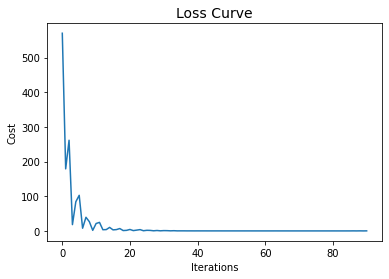

In [11]:
plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [12]:
# lasso regression for feature importance
from sklearn.linear_model import Lasso

# lasso regression model
lasso = Lasso(alpha=0.1)

# fit the model to the training data
lasso.fit(X_train, y_train)

# coefficients
feature_importance = pd.Series(lasso.coef_, index=X_encoded.columns)

# features with non-zero coefficients
selected_features = feature_importance[feature_importance != 0]

# selected features
print(selected_features)

# evaluate model
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTraining:")
print("MSE:", mse_train)
print("R-squared Score:", r2_train)
print("\nTest:")
print("MSE:", mse_test)
print("R-squared Score:", r2_test)


num_critic_for_reviews    0.043573
duration                  0.170278
actor_3_facebook_likes   -0.000003
num_voted_users           0.284564
dtype: float64

Training:
MSE: 0.6662191948816552
R-squared Score: 0.2842827118012061

Test:
MSE: 0.4803742059726338
R-squared Score: 0.22293622601209784


Text(0.5, 1.0, 'Coefficient Shrinkage')

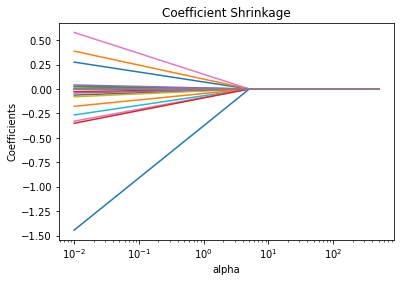

In [13]:
alphas = np.linspace(0.01, 500, 100)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Coefficient Shrinkage')


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

"param_grid = {\n    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],\n    'max_iter': [50, 100],\n    'activation': ['tanh', 'relu'],\n    'solver': ['sgd', 'adam'],\n    'alpha': [0.0001, 0.05],\n    'learning_rate': ['constant','adaptive'],\n}\n\ngrid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5)\ngrid.fit(X_train, y_train)\n\nprint(grid.best_params_) "

In [14]:
grid_predictions = grid.predict(X_test)

y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nTraining:")
print("MSE:", mse_train)
print("R-squared Score:", r2_train)
print("\nTest:")
print("MSE:", mse_test)
print("R-squared Score:", r2_test)

'grid_predictions = grid.predict(X_test)\n\ny_train_pred = grid.predict(X_train)\ny_test_pred = grid.predict(X_test)\nmse_train = mean_squared_error(y_train, y_train_pred)\nmse_test = mean_squared_error(y_test, y_test_pred)\nr2_train = r2_score(y_train, y_train_pred)\nr2_test = r2_score(y_test, y_test_pred)\nprint("\nTraining:")\nprint("MSE:", mse_train)\nprint("R-squared Score:", r2_train)\nprint("\nTest:")\nprint("MSE:", mse_test)\nprint("R-squared Score:", r2_test)'